In [3]:
source("R_functions/hla_functions.R")
source('libraries.R')

### Preprocessing and preparing variation table and subsequent HLA+PCs matrices

In [29]:
source('hla_reference_df.R')

In [33]:
ind_in_cdr3 <- unique(read.table('../data/ids_in_cdr3.txt')$V1)

hla_features <- fread('../data/hla/hla_features.tsv')
hla_features <- hla_features[patient_id %in% ind_in_cdr3]
pca_hla <- fread('../data/hla/pca_hla_9PCs.tsv')

source('hla_matrices.R')


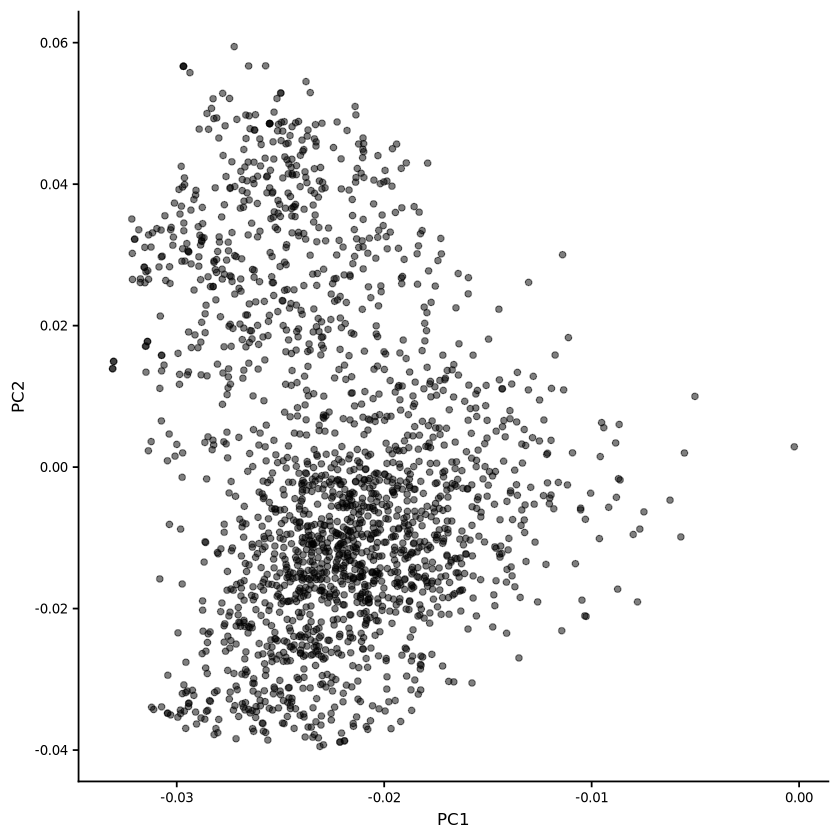

In [34]:
#pca_hla <- pca_hla_fun(hla_features)
ggplot(pca_hla, aes(x = PC1, y = PC2)) +
    geom_point(alpha = 0.5) +
    #scale_color_manual(values = c('healthy' = "#673AB7", 'IBD' = "#FF6F61" )) +
    theme_cowplot() + 

      theme(
    plot.title = element_text(size = 12),         # Adjust title size
    axis.title = element_text(size = 10),         # Adjust axis title size
    axis.text = element_text(size = 8),           # Adjust axis label size
    legend.title = element_text(size = 10),       # Adjust legend title size
    legend.text = element_text(size = 8)          # Adjust legend text size
  )

In [30]:
hla_variations_all <- hla_variations_all[,-(1:9)] %>% rowwise() %>% mutate(variat = Reduce(paste, variat)) %>% ungroup()

In [31]:
write_tsv(hla_variations_all, '../data/hla_site_variations_healthy_and_ibd_all_variable_sites_v3.tsv')

In [5]:
hla_variations_all <- fread('../data/hla/hla_site_variations_healthy_and_ibd_all_variable_sites_v3.tsv')

In [18]:
n_ind_per_site

gene,site,n_ind
<chr>,<int>,<int>
A,9,1900
A,44,1900
A,62,1899
A,63,1899
A,65,1900
A,66,1900
A,67,1900
A,70,1900
A,74,1900


In [15]:
n_ind_per_site <- hla_variations_all %>% group_by(gene, site) %>% summarise(n_ind = uniqueN(patient_id))

`summarise()` has grouped output by 'gene'. You can override using the `.groups` argument.


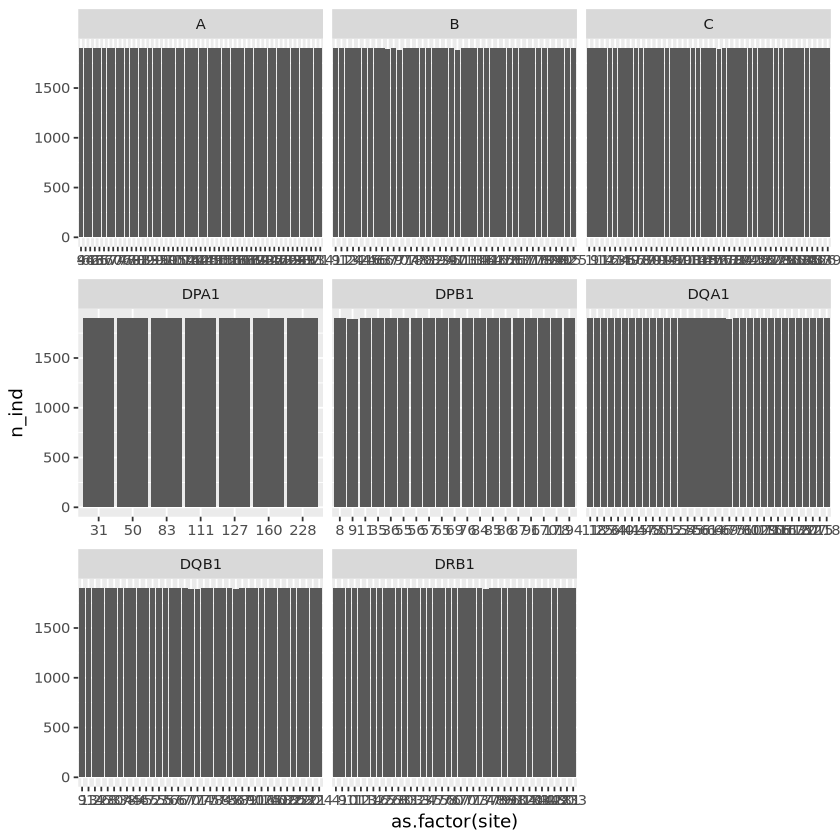

In [31]:
ggplot(n_ind_per_site, aes(x = as.factor(site), y = n_ind)) +
       geom_col() + 
       facet_wrap(~gene, scales = 'free_x')

In [21]:
healthy_hla_variation <- read_tsv('../data/healthy_hla_variations_long.tsv') %>% mutate(patient_id = paste0('H', patient_id))
healthy_hla_variation
ibd_duplicates <- read.table('../../TCellData//ids_to_remove.txt')$V1
ibd_hla_variation <- read_tsv('../data/ibd_hla_variations_long.tsv') %>% 
    filter(! patient_id %in% ibd_duplicates) %>% 
    mutate(patient_id = paste0('I', patient_id))
ibd_hla_variation
hla_variation <- bind_rows(healthy_hla_variation, ibd_hla_variation)
write_tsv(hla_variation, '../data/hla_variations_long_healthy_and_ibd.tsv')

Rows: 812922 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): gene, allele, AA
dbl (4): patient_id, homo_hetero, site, n_variat
lgl (1): variat

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,allele,patient_id,homo_hetero,site,AA,variat,n_variat
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
A,A*01:01,H0,1,9,F,NA,4
A,A*01:01,H0,1,12,V,NA,2
A,A*01:01,H0,1,17,R,NA,2
A,A*01:01,H0,1,43,Q,NA,2
A,A*01:01,H0,1,44,K,NA,2
A,A*01:01,H0,1,56,G,NA,2
A,A*01:01,H0,1,62,Q,NA,5
A,A*01:01,H0,1,63,E,NA,3
A,A*01:01,H0,1,65,R,NA,2


Rows: 670457 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): gene, allele, AA
dbl (5): patient_id, homo_hetero, site, n_carriers, n_variat
lgl (1): variat

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patient_id,gene,allele,homo_hetero,site,AA,n_carriers,variat,n_variat
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>
I0,A,A*01:01,1,9,F,1066,NA,4
I0,A,A*01:01,1,17,R,1192,NA,2
I0,A,A*01:01,1,44,K,345,NA,2
I0,A,A*01:01,1,56,G,1190,NA,2
I0,A,A*01:01,1,62,Q,877,NA,5
I0,A,A*01:01,1,63,E,1172,NA,3
I0,A,A*01:01,1,65,R,1182,NA,2
I0,A,A*01:01,1,66,N,1016,NA,2
I0,A,A*01:01,1,67,M,345,NA,2


In [16]:
hla_split <- split(hla_variation,  by= c('gene', 'site'))

In [36]:
setdiff(pca_hla$patient_id, hla_matrix$patient_id)
merge(hla_matrix, pca_hla, by = 'patient_id')

[1] "I1003" "I1072" "I1104" "I1232" "I1277" "I1390" "I34"   "I528"  "I585" 
[10] "I829"  "I883"  "I901"

patient_id,allele_F,allele_S,allele_T,allele_Y,PC1,PC2,PC3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H0,1,1,0,0,-0.029692189,-0.0377087310,6.333814e-03
H1,0,0,0,2,-0.019258673,-0.0123714372,-1.195331e-02
H10,1,1,0,0,-0.022739553,0.0182672802,-5.400625e-03
H100,1,0,0,1,-0.001371749,-0.0027128072,2.178360e-02
H101,2,0,0,0,-0.026652032,0.0126704580,-1.529705e-02
H102,1,1,0,0,-0.029650841,0.0142905032,1.353018e-02
H103,0,0,0,2,-0.023048159,-0.0190687494,-1.354299e-02
H104,1,1,0,0,-0.028317215,-0.0398804205,3.302092e-02
H105,1,1,0,0,-0.024811914,-0.0226903028,2.297469e-02


In [38]:
for (h in hla_split){
    gene_site <- paste0(h$gene[1], '_', h$site[1])
    hla_df <- h[,.(patient_id, homo_hetero, AA)]
    hla_matrix <- dcast(hla_df, patient_id ~ AA, value.var = 'homo_hetero', fill = 0)
    setnames(hla_matrix, old = names(hla_matrix)[-1], new = paste0("allele_", names(hla_matrix)[-1]))
    hla_matrix_pcs <- merge(hla_matrix, pca_hla, by = 'patient_id')
    hla_matrix_pcs$G_S <- gene_site
    fwrite(hla_matrix_pcs, paste0('../hla_matrices_v3/with_pcs/', gene_site, '.tsv'), sep = '\t')
}

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation function missing: defaulting to length

Aggregation 

## Visualisation of HLA variations

### HLA alleles plot stacked with aa variations

In [ ]:
for (gene_name in hla_genes){
  hla_plot <- ggplot(hlas_variation_with_gene_col %>% filter(gene == gene_name), aes(x=position, y= n_variat, fill = allele)) +
    geom_bar(stat = "identity", position = "stack") +
    scale_fill_discrete(guide = 'none') +
    ggtitle("HLA allele variations position-wise") +
    xlab("") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
   

  ggsave(paste0('../plots/',gene_name,'variations_aa_TRB.jpg'),hla_plot)

}


In [ ]:

plotting_hla <- ggplot(hla_variation, aes(x = position, y = change, fill = aa)) +
  geom_bar(stat = "identity", position = "stack") + 
  ggtitle(paste0("HLA ",dict_hla_with_start_position[i,'hla_gene'] , " position-wise allele variations in amino acid usage")) +
  xlab("Positions on the gene") +
  ylab("Number of variations") +
  scale_x_discrete(breaks = levels(hla_variation$positions)[floor(seq(1, 
                                                 nlevels(hla_variation$positions), 
                                                 length.out = 50))]) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

  
ggsave(paste0('../plots/',dict_hla_with_start_position[i,'hla_gene'],'_stacked_TRB.jpeg'), plotting_hla, width = 8, height = 7)  

### Visualisation of correlations between HLA aa across all HLA sites

In [1]:
source('libraries.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


Registered S3 methods overwritten by 'ggtern':
  method           from   
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

--
Remember to cite, run citation(package = 'ggtern') for further info.
--


Attaching package: ‘ggtern’


The following objects are masked from ‘package:ggplot2’:

    aes, annotate, ggplot, ggplot_build, ggplot_gtable, ggplotGrob,
    ggsave, layer_data, theme_bw, theme_classic, theme_dark,
    theme_gray, theme_light, theme_linedraw, theme_minimal, theme_void


Loading required package: viridisLite


Attaching package: ‘arrow’


The following obje

In [19]:
hla_var <- fread('../data/hla/hla_site_variations_healthy_and_ibd_all_variable_sites_updated.tsv')
hla_var <- hla_var[, hla_site_aa := paste(HLA, Site_hla, AA, sep = '_')][, .(patient_id, hla_site_aa, homo_hetero)]

In [20]:
head(hla_var)

patient_id,hla_site_aa,homo_hetero
<chr>,<chr>,<int>
H1,DRB1_4_Q,1
H103,DRB1_4_Q,1
H106,DRB1_4_Q,1
H107,DRB1_4_Q,1
H11,DRB1_4_Q,1
H110,DRB1_4_Q,2


In [23]:
wide_hla <- dcast(hla_var, patient_id ~ hla_site_aa, value.var = 'homo_hetero', fill = 0)

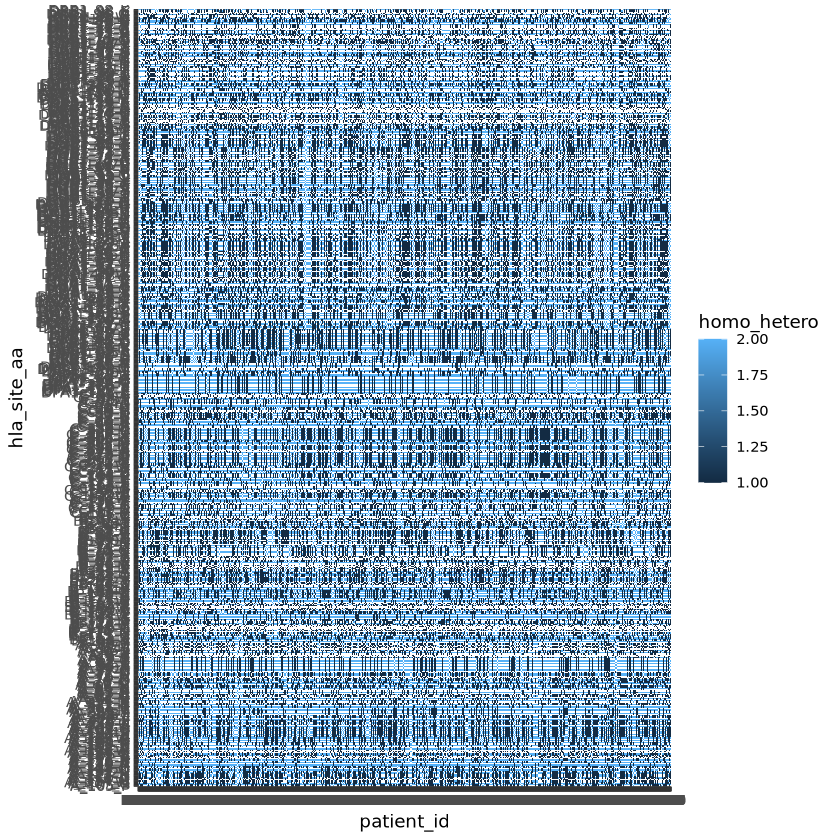

In [28]:
ggplot(hla_var, aes(x = patient_id, y = hla_site_aa, fill = homo_hetero)) + 
geom_tile()

In [32]:
hla_cor <- cor(wide_hla[,-1])

In [37]:
head(hla_cor)

,A_105_P,A_105_S,A_107_G,A_107_W,A_114_H,A_114_Q,A_114_R,A_116_D,A_116_Y,A_127_K,⋯,DRB1_86_G,DRB1_86_V,DRB1_9_E,DRB1_9_W,DRB1_96_E,DRB1_96_H,DRB1_96_Q,DRB1_96_Y,DRB1_98_E,DRB1_98_K
A_105_P,1.0000000,-1.0000000,0.4639072,-0.4639072,-0.5482824,0.3398864,0.3383471,0.5738185,-0.5482824,-0.5930093,⋯,-0.11427503,0.11427503,0.08520054,-0.08261178,-0.03310277,0.109922195,-0.05183602,-0.072714243,-0.08303313,0.08303313
A_105_S,-1.0000000,1.0000000,-0.4639072,0.4639072,0.5482824,-0.3398864,-0.3383471,-0.5738185,0.5482824,0.5930093,⋯,0.11427503,-0.11427503,-0.08520054,0.08261178,0.03310277,-0.109922195,0.05183602,0.072714243,0.08303313,-0.08303313
A_107_G,0.4639072,-0.4639072,1.0000000,-1.0000000,-0.7858354,0.2562195,0.5743285,0.7545813,-0.7858354,-0.7349788,⋯,-0.12636846,0.12636846,-0.01351466,0.02514446,0.02114034,0.020877300,0.03521752,-0.090025518,-0.09948419,0.09948419
A_107_W,-0.4639072,0.4639072,-1.0000000,1.0000000,0.7858354,-0.2562195,-0.5743285,-0.7545813,0.7858354,0.7349788,⋯,0.12636846,-0.12636846,0.01351466,-0.02514446,-0.02114034,-0.020877300,-0.03521752,0.090025518,0.09948419,-0.09948419
A_114_H,-0.5482824,0.5482824,-0.7858354,0.7858354,1.0000000,-0.3231430,-0.7279560,-0.9553213,1.0000000,0.9355263,⋯,0.12088234,-0.12088234,0.01977704,-0.02668711,-0.03842044,-0.007858779,-0.02012962,0.069645786,0.07675076,-0.07675076
A_114_Q,0.3398864,-0.3398864,0.2562195,-0.2562195,-0.3231430,1.0000000,-0.3517143,0.3294953,-0.3231430,-0.3441963,⋯,-0.04209799,0.04209799,0.03469918,-0.03619921,0.01755345,-0.002022390,-0.01284307,0.001399891,-0.03584275,0.03584275


In [40]:
ggsave('../plots/hla_cor.png', heatmap(hla_cor), width = 15, height = 15)

ERROR: Error in UseMethod("grid.draw"): no applicable method for 'grid.draw' applied to an object of class "list"
